# Package import

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
import seaborn as sns
from ggplot import *
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline
pd.set_option('display.max_rows', 300)

# Data Load

In [52]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeArea/populationCount.csv', skiprows=8) # 105*8
ageStructure = pd.read_csv('postcodeArea/ageStructure.csv', skiprows=8) #105*20
relationalSituation = pd.read_csv('postcodeArea/relational.csv', skiprows=8) #105*8
livingArrangements = pd.read_csv('postcodeArea/livingArrangements.csv', skiprows=8) #105*9
householdComposition = pd.read_csv('postcodeArea/householdComposition.csv', skiprows=8) #105*23
notInEmploymentDependencies = pd.read_csv('postcodeArea/notInEmploymentDependencies.csv', skiprows=8) #105*10
loneParentDependencies = pd.read_csv('postcodeArea/loneParentDependencies.csv', skiprows=8)#105*13
ethnicGroup = pd.read_csv('postcodeArea/ethnicGroup.csv', skiprows=8) #105*25
industry = pd.read_csv('postcodeArea/industry.csv', skiprows=8)#105*26
tenure = pd.read_csv('postcodeArea/tenure.csv', skiprows=7) #105*8
hoursWorked = pd.read_csv('postcodeArea/hoursWorked.csv', skiprows=8) #105*6
dwelling = pd.read_csv('postcodeArea/dwelling.csv', skiprows=8) #105*5
englishProf = pd.read_csv('postcodeArea/englishProf.csv', skiprows=8) #105*7
centralHeating = pd.read_csv('postcodeArea/centralHeating.csv', skiprows=8) #105*9
passportHeld = pd.read_csv('postcodeArea/passportHeld.csv', skiprows=7) #105*73
birthCountry = pd.read_csv('postcodeArea/birthCountry.csv', skiprows=8) #105*9
religion = pd.read_csv('postcodeArea/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeArea/generalHealth.csv', skiprows=8) #105*7
yearLastWorked = pd.read_csv('postcodeArea/yearLastWorked.csv', skiprows=8) #105*13
householdSize = pd.read_csv('postcodeArea/householdSize.csv', skiprows=8) #105*10
carOrVanAvailability = pd.read_csv('postcodeArea/carOrVanAvailability.csv', skiprows=8) #105*7
distanceTravelledtoWork = pd.read_csv('postcodeArea/distanceTravelledtoWork.csv', skiprows=8) #105*14
methodofTraveltoWork = pd.read_csv('postcodeArea/methodofTraveltoWork.csv', skiprows=8) #105*14
ageofArrival = pd.read_csv('postcodeArea/ageofArrival.csv', skiprows=8) #105*19
lengthofResidence = pd.read_csv('postcodeArea/lengthofResidence.csv', skiprows=8) #105*7
occupationType = pd.read_csv('postcodeArea/occupation.csv', skiprows=8) #105*11
mainLanguage = pd.read_csv('postcodeArea/mainLanguage.csv', skiprows=8) #105*105
bedrooms = pd.read_csv('postcodeArea/bedrooms.csv', skiprows=8) #105*8
longTermDisability = pd.read_csv('postcodeArea/longTermDisability.csv', skiprows=8) #105*5
economicActivity = pd.read_csv('postcodeArea/economicActivity.csv', skiprows=8) #105*17
positionInCommunalEstablishment = pd.read_csv('postcodeArea/positionInCommunalEstablishment.csv', skiprows=8) #105*5
accomType = pd.read_csv('postcodeArea/accomType.csv', skiprows=8) #105*13
secondAddress = pd.read_csv('postcodeArea/secondAddress.csv', skiprows=8) #105*6
formerIndustry = pd.read_csv('postcodeArea/formerIndustry.csv', skiprows=8) #105*11
formerOccupation = pd.read_csv('postcodeArea/formerOccupation.csv', skiprows=8) #105*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeArea/qualification.csv', skiprows=8) #105*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [53]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [54]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    29.5
Name: 0.7, dtype: float64

In [55]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=29.5, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

,postcode areas,target,perc
classification,,,
0,73,73,0.695238
1,32,32,0.304762


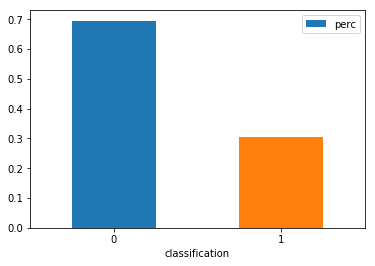

In [56]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [57]:
###Merge different datasets
newDF = [population, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode areas') for i in newDF],axis=1, join='outer')

In [58]:
#Check for dimensions
newDF2.shape

(109, 905)

In [59]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(105, 905)

In [60]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [61]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

In [62]:
newDF4.shape

(105, 854)

In [63]:
y = newDF4.classification
print(type(y))
y = y.to_frame().reset_index()
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [64]:
x = newDF4.drop(['target','classification'], axis=1)

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=50)

principalComponents = pca.fit_transform(x)

In [65]:
components=[]
i=0

In [66]:
while i <50:
    i = i+1
    word = "component " +str(i)
    components.append(word)

In [67]:
principalDF = pd.DataFrame(data = principalComponents
             , columns = components)

In [68]:
principalDF.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,component 41,component 42,component 43,component 44,component 45,component 46,component 47,component 48,component 49,component 50
0,-14.575824,-8.511973,0.359624,0.137866,0.190854,-0.938508,-0.516956,0.962788,-0.082379,-2.603740,...,-0.516068,-0.262479,-0.020263,0.049234,0.174717,0.413070,-0.871902,0.279147,0.828152,0.401872
1,72.869734,38.205547,25.895308,-6.069291,5.253235,-9.160078,-2.521276,16.915961,-6.612019,4.028104,...,-0.597012,-0.249916,0.411880,0.399538,0.261778,0.335636,0.245524,-0.055217,-0.242153,-0.429070
2,-7.841812,1.585155,-5.200558,0.154038,-1.360889,1.160594,-0.305109,-0.331057,-4.286101,0.190358,...,-0.171654,-0.810185,0.489358,-1.397007,0.770901,-0.551269,-0.274952,0.478535,0.738733,-0.903676
3,-8.590026,3.285280,4.545940,0.099767,2.740192,-2.822513,1.326127,1.442996,0.961377,0.222791,...,-0.000406,-0.851149,-1.024395,-0.952672,-0.596057,-1.873541,0.194462,-0.104384,-1.298093,0.101164
4,-0.130228,3.172003,8.758334,-1.314734,4.150453,-4.057376,3.891503,4.926266,-0.489035,0.860780,...,-0.363885,1.928639,2.119003,1.924599,-0.255955,0.123506,0.200364,-1.114267,0.157424,1.200625


In [69]:
#HYPER PARAMETER TUNE
Perplexity = [15,45]
n_iter = [250,500,750,1000]
learningRate = [100,250,500,750]


In [70]:
def tSNEOptinmisation(i,j,k,principalDF):
    #define parameters
    tsne = TSNE(n_components=2, perplexity=i, n_iter=j,learning_rate=k)
    #train model
    tsne_results = tsne.fit_transform(principalDF)
    return tsne_results
    
    
    

  Perplexity =15          No of Iterations =250         Learning Rate =100


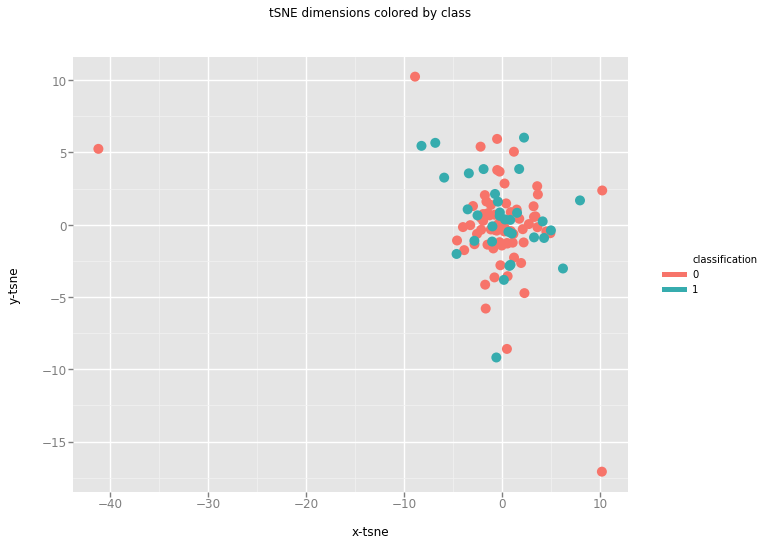

<ggplot: (119185491085)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =250         Learning Rate =250


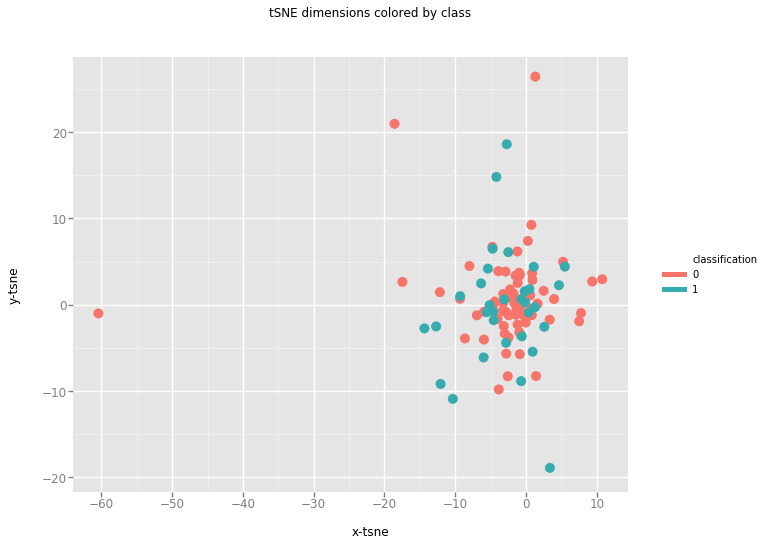

<ggplot: (-9223371917538095847)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =250         Learning Rate =500


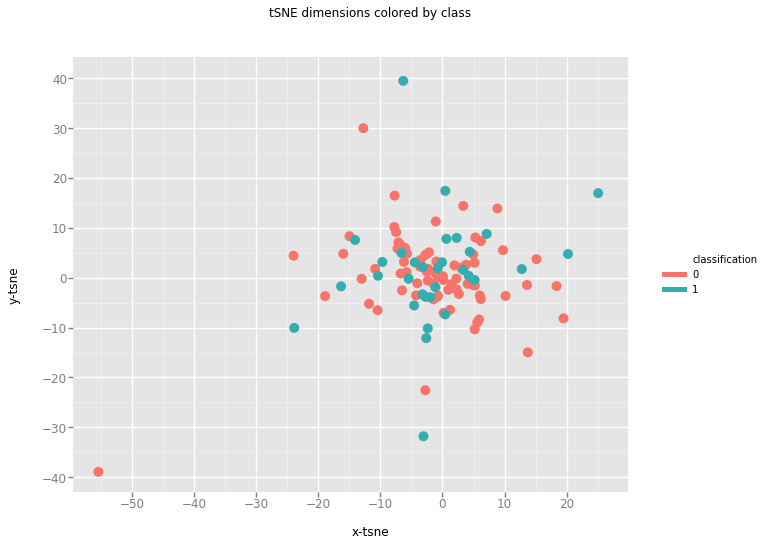

<ggplot: (119185497292)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =250         Learning Rate =750


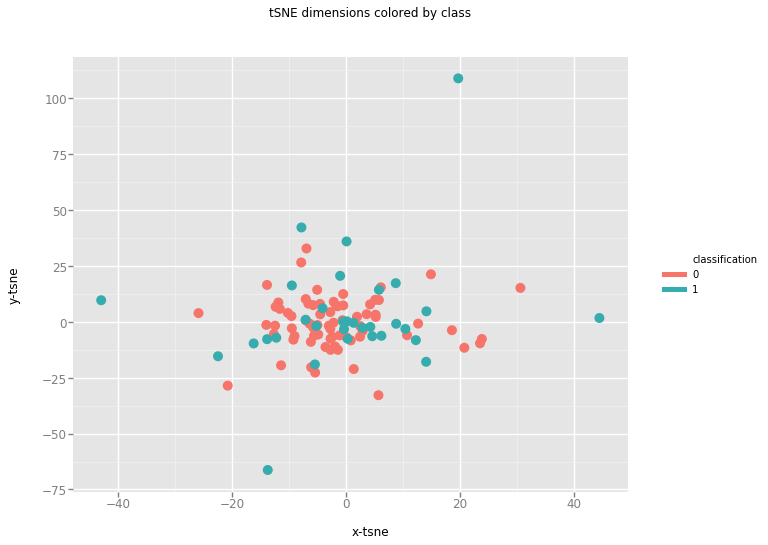

<ggplot: (-9223371917538138687)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =100


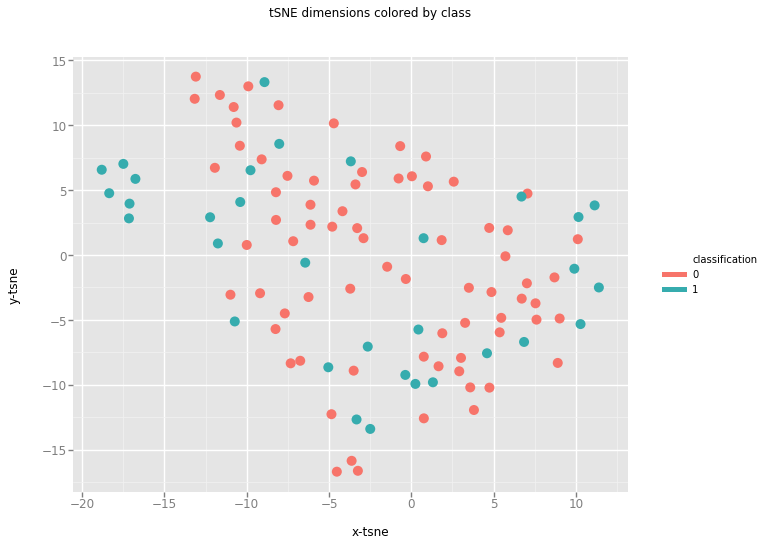

<ggplot: (-9223371917538188782)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =250


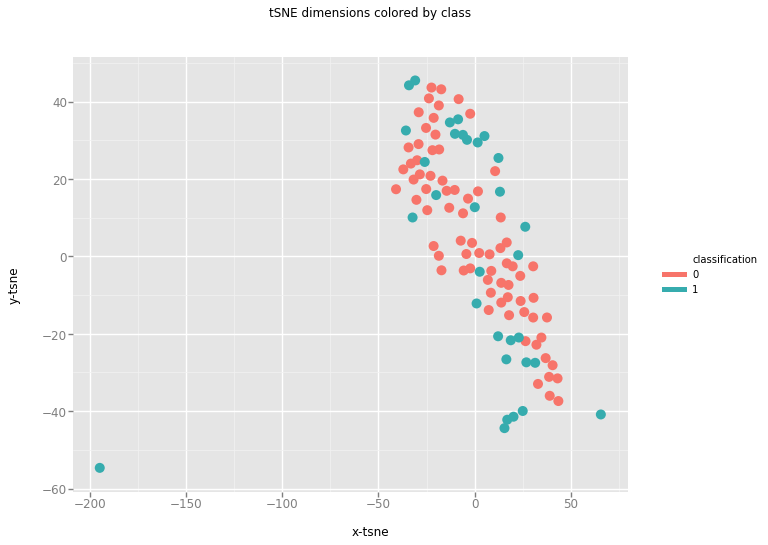

<ggplot: (119316647905)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =500


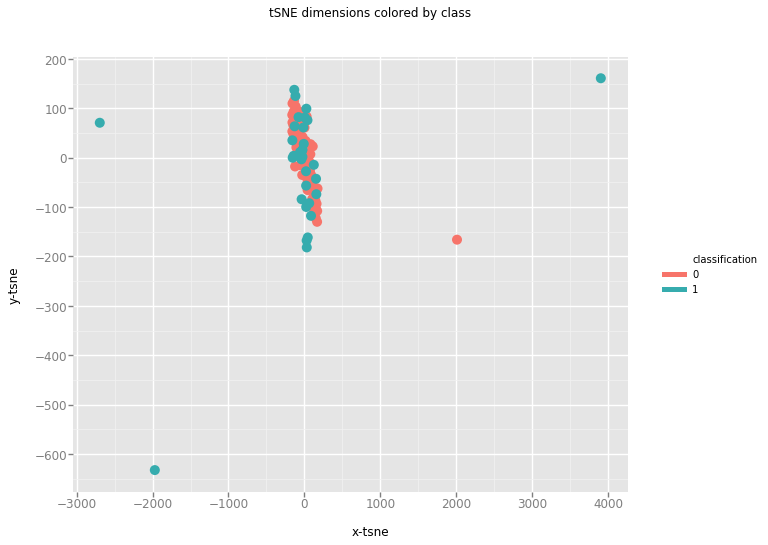

<ggplot: (-9223371917538107581)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =500         Learning Rate =750


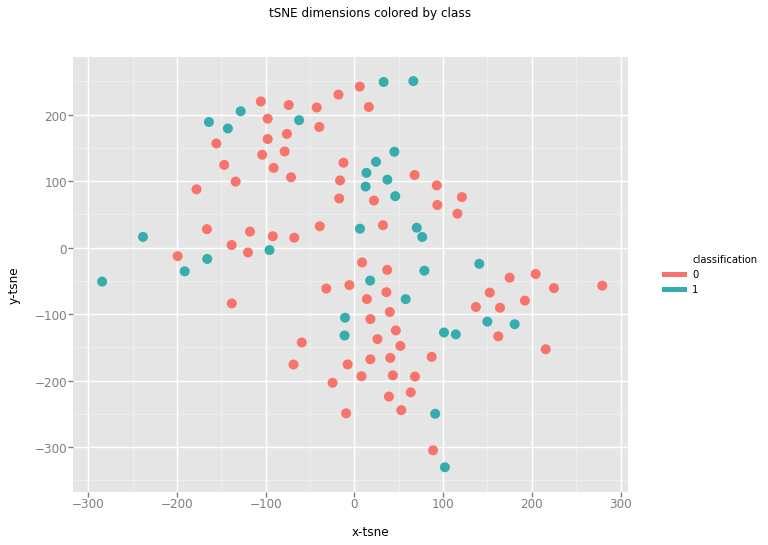

<ggplot: (-9223371917538182428)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =100


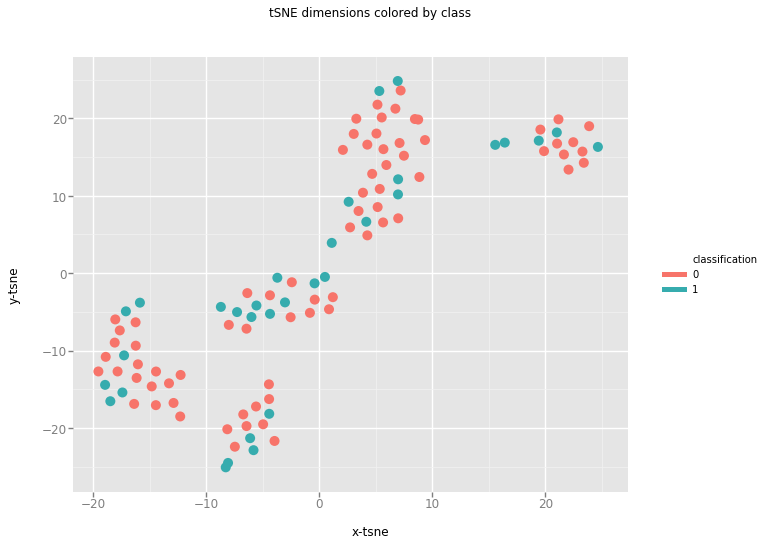

<ggplot: (119316662420)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =250


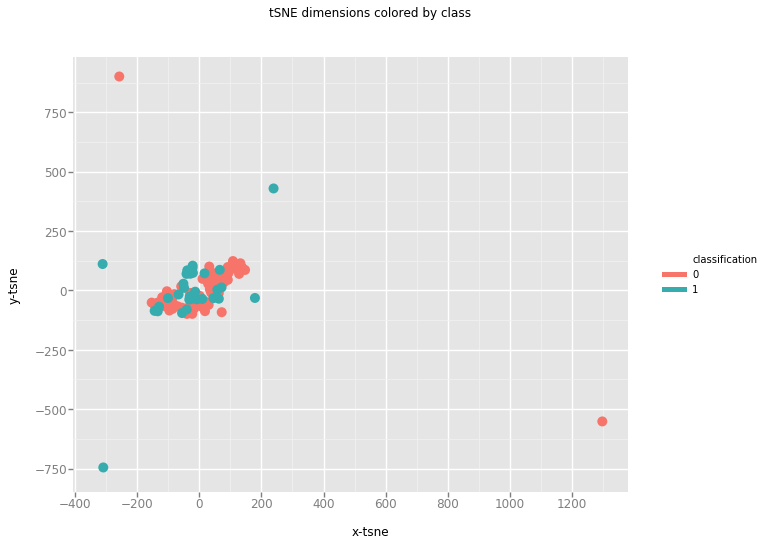

<ggplot: (119186504908)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =500


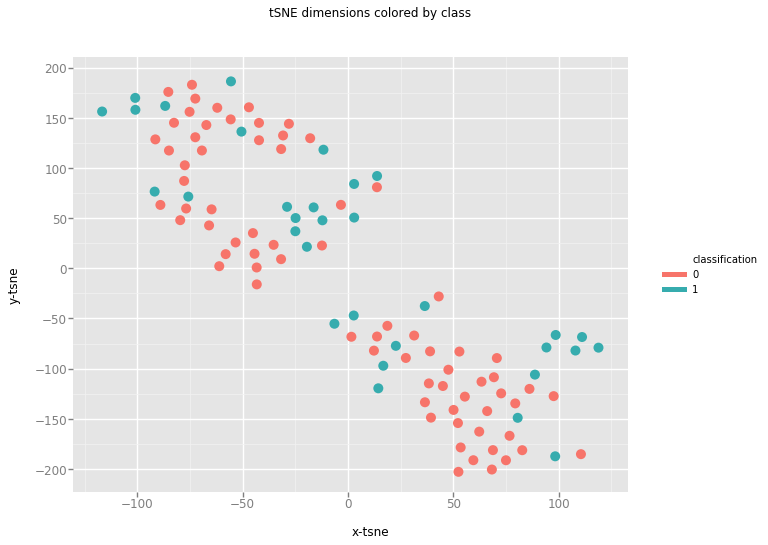

<ggplot: (119316620650)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =750         Learning Rate =750


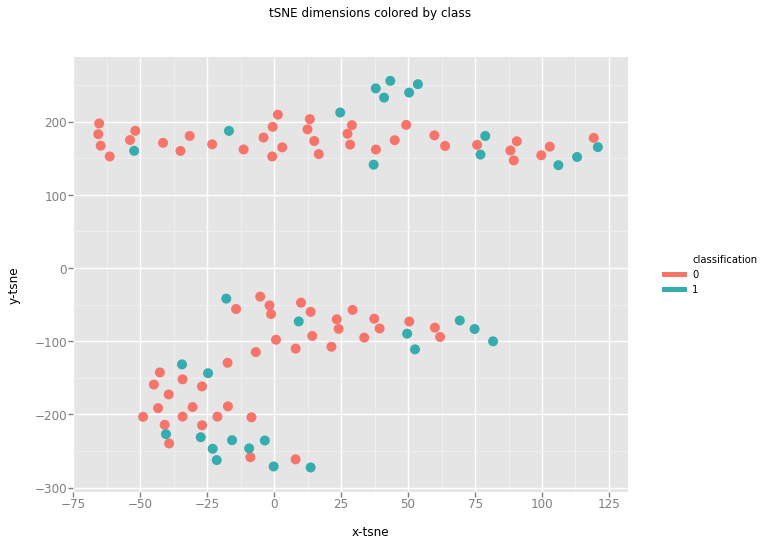

<ggplot: (119315189238)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =100


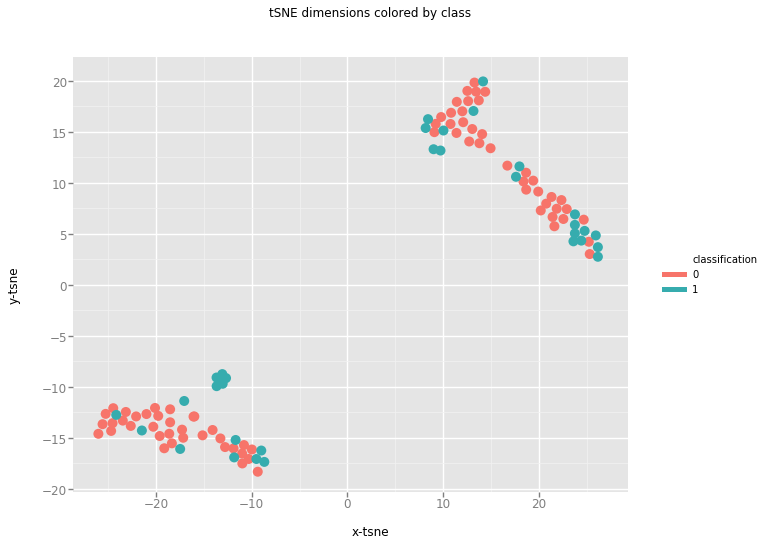

<ggplot: (-9223371917538095118)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =250


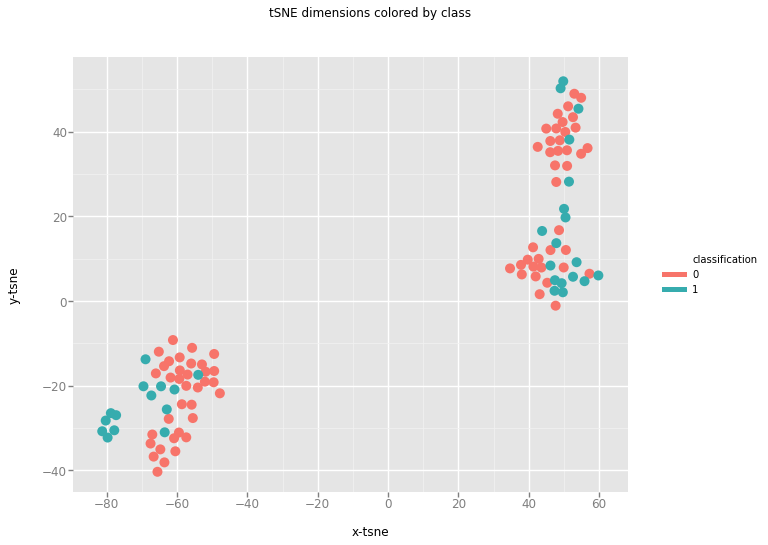

<ggplot: (119185482139)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =500


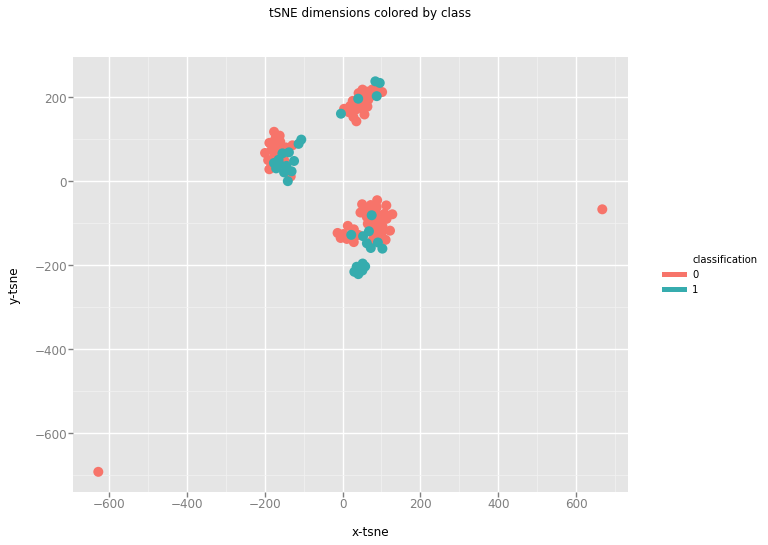

<ggplot: (-9223371917536061205)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =15          No of Iterations =1000         Learning Rate =750


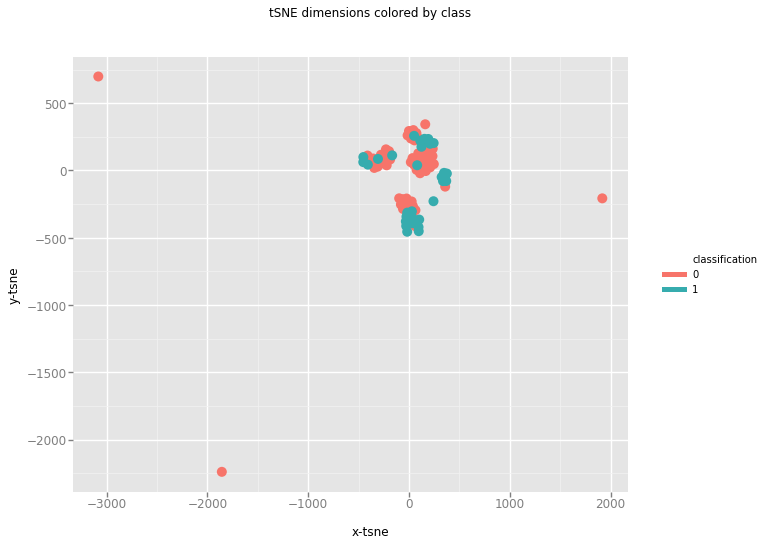

<ggplot: (-9223371917668285352)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =100


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


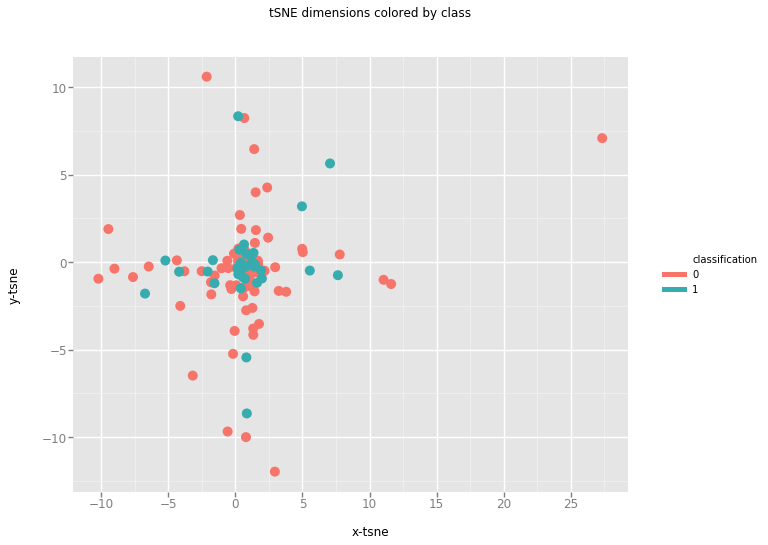

<ggplot: (-9223371917668285387)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =250


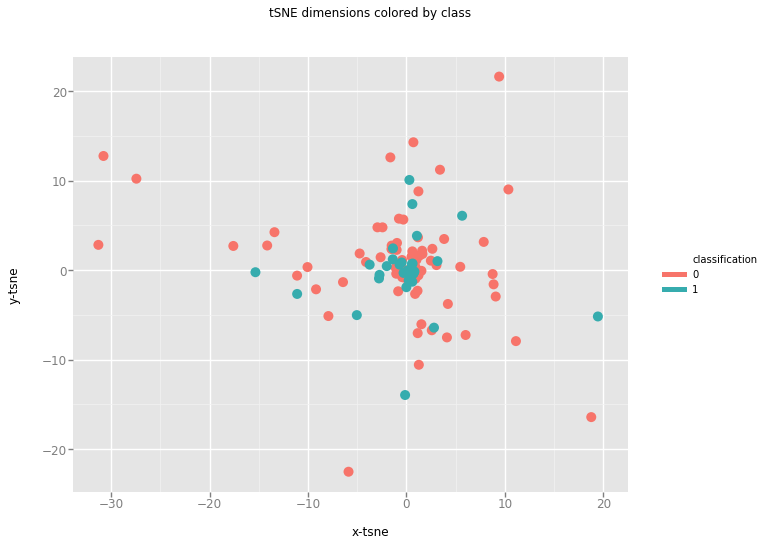

<ggplot: (119316678429)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =500


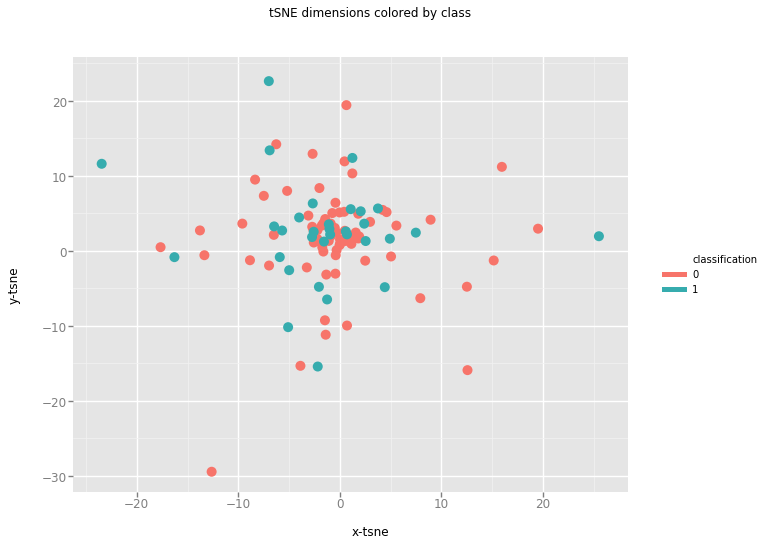

<ggplot: (-9223371917540684014)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =250         Learning Rate =750


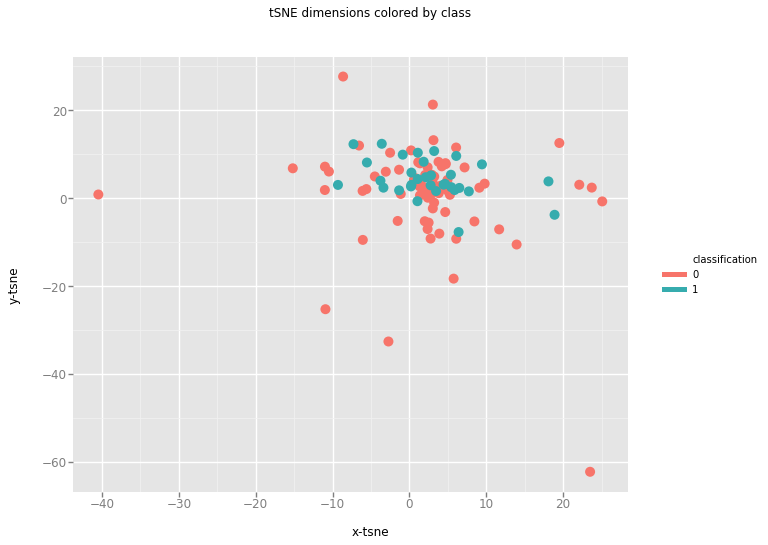

<ggplot: (119318732054)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =100


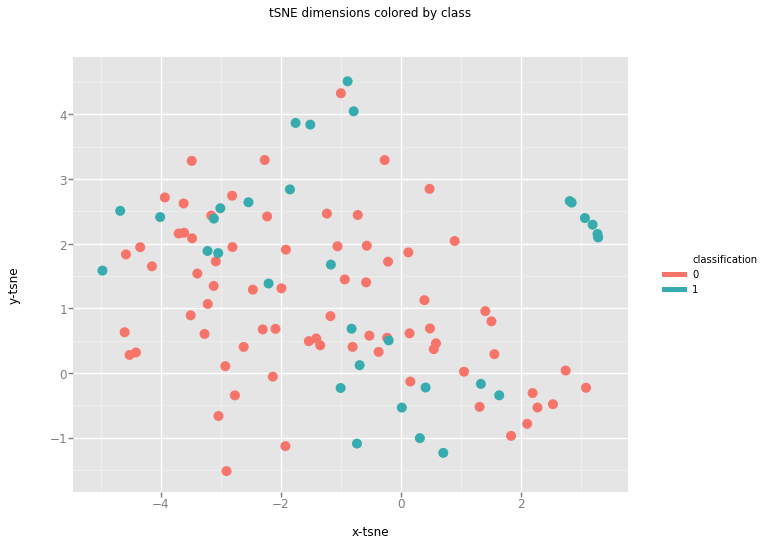

<ggplot: (119316529619)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =250


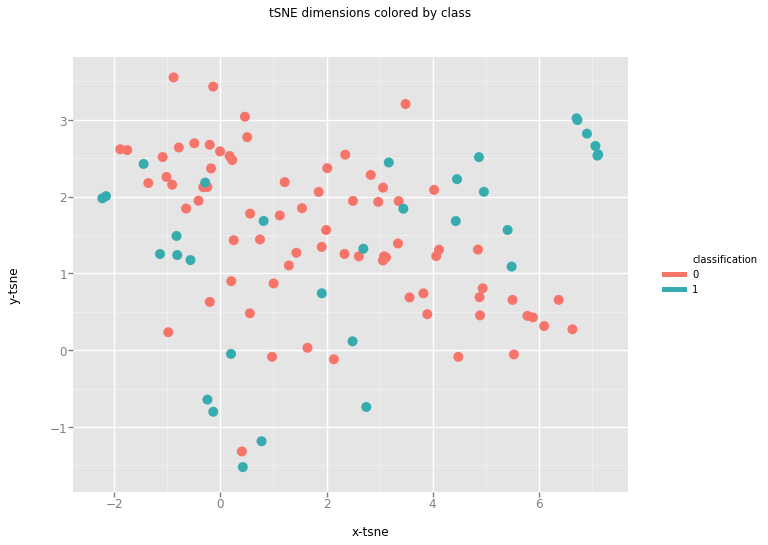

<ggplot: (119316617336)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =500


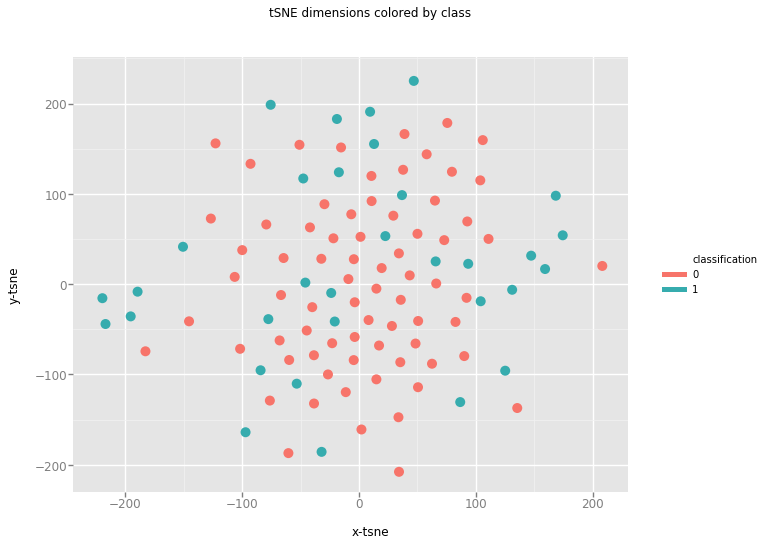

<ggplot: (-9223371917535994750)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =500         Learning Rate =750


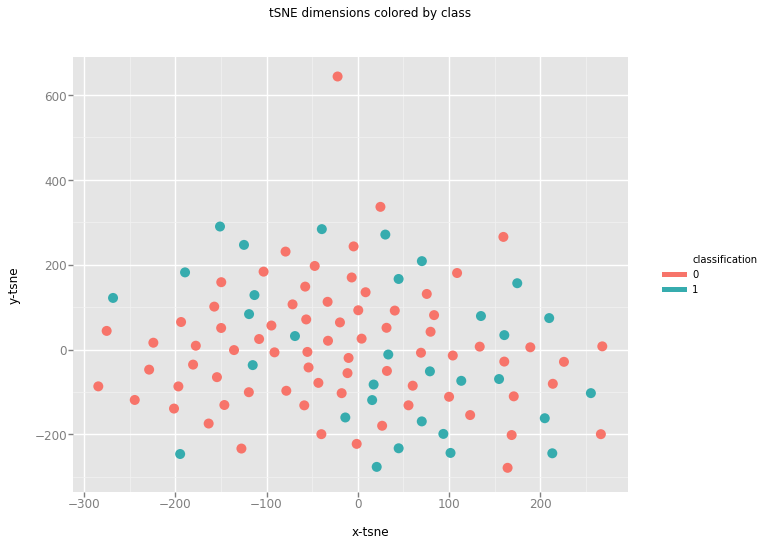

<ggplot: (-9223371917540680581)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =100


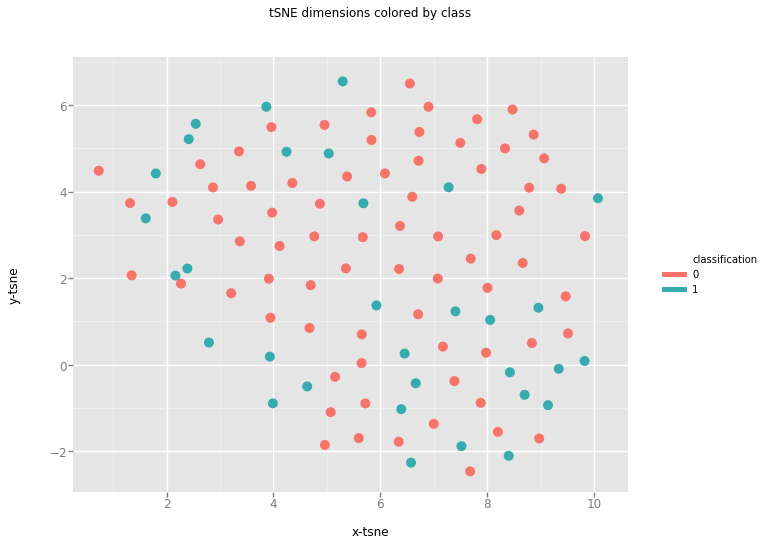

<ggplot: (-9223371917536018144)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =250


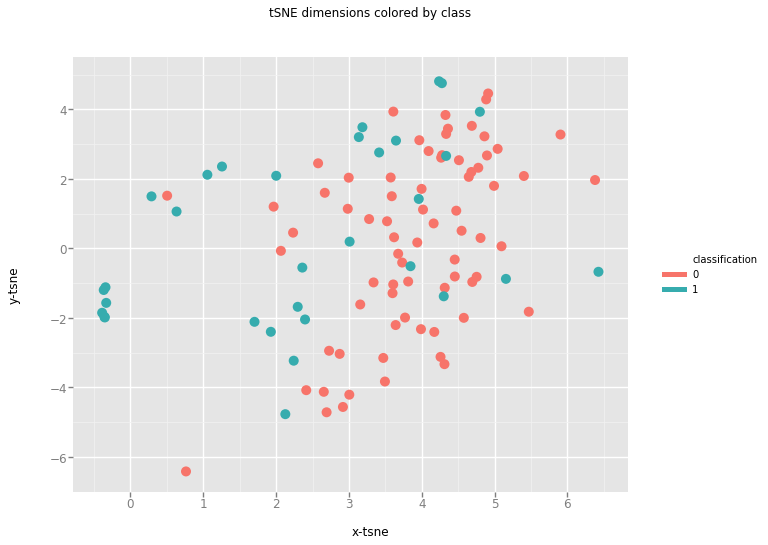

<ggplot: (-9223371917669323846)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =500


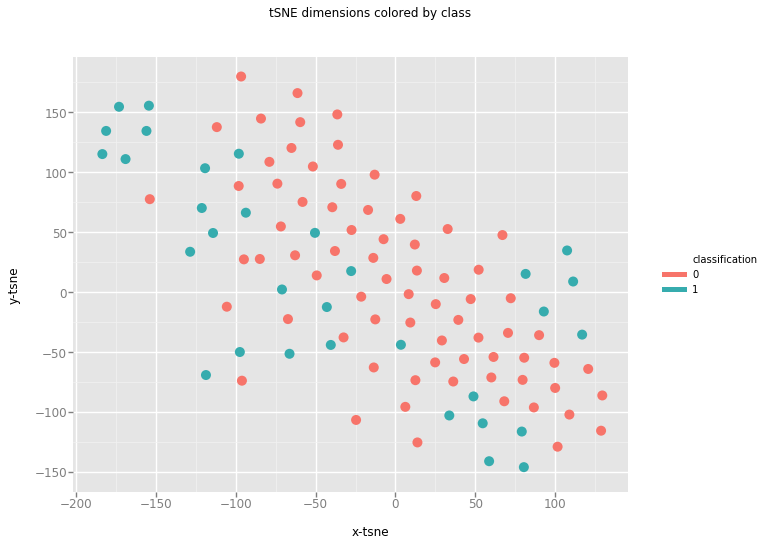

<ggplot: (-9223371917536057954)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =750         Learning Rate =750


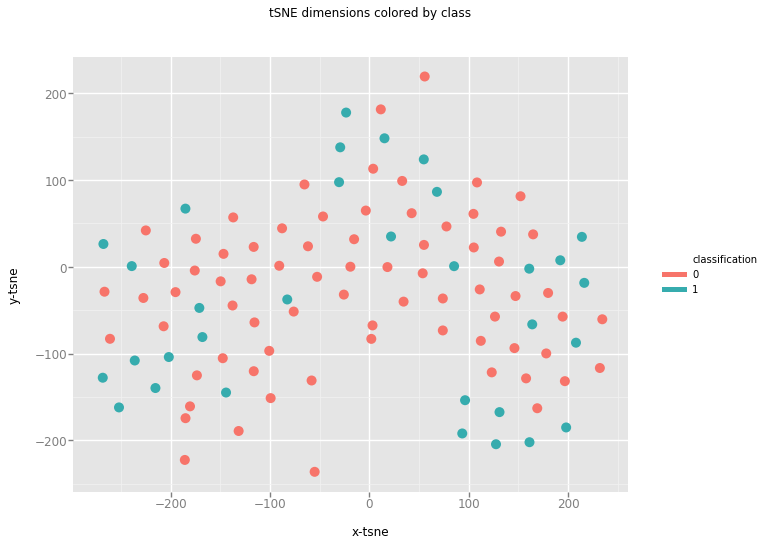

<ggplot: (119316616754)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =100


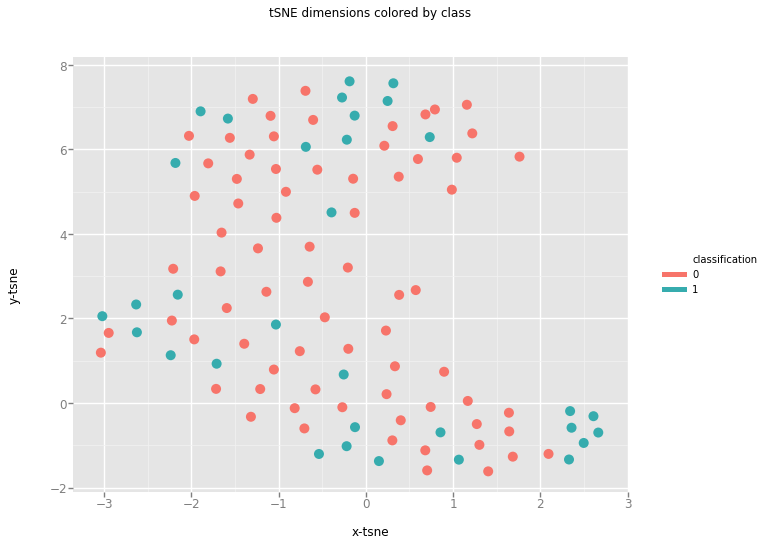

<ggplot: (-9223371917538197381)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =250


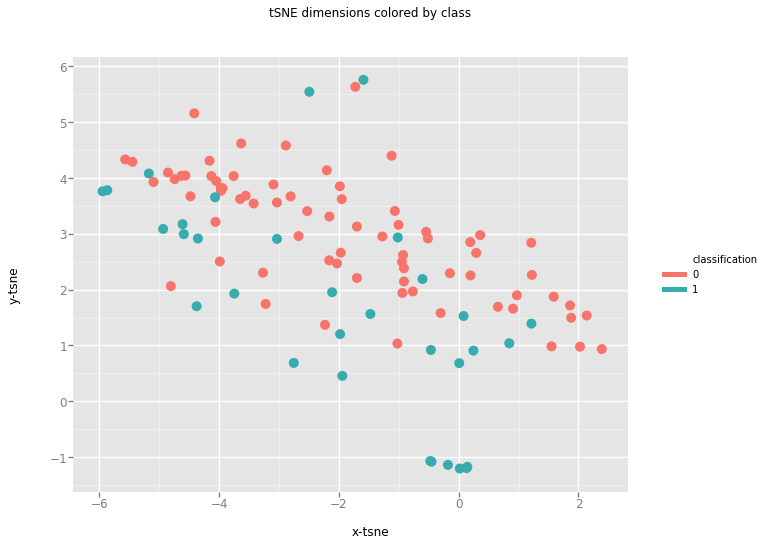

<ggplot: (119318732580)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =500


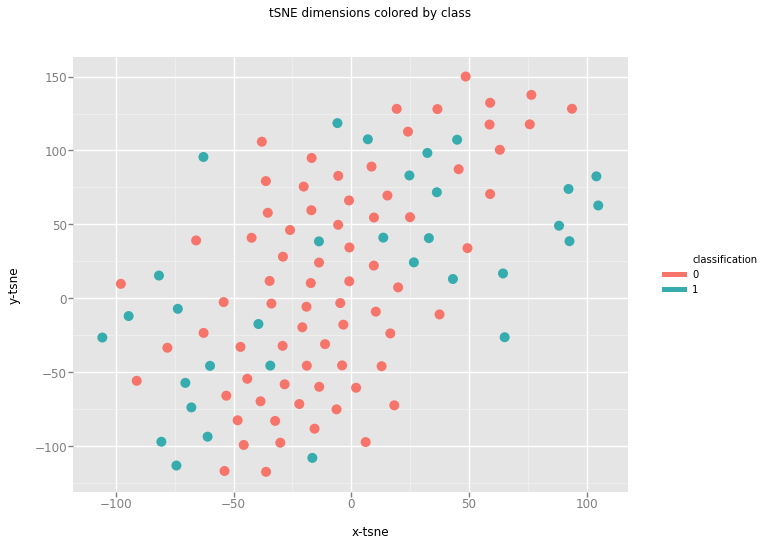

<ggplot: (-9223371917538168190)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Perplexity =45          No of Iterations =1000         Learning Rate =750


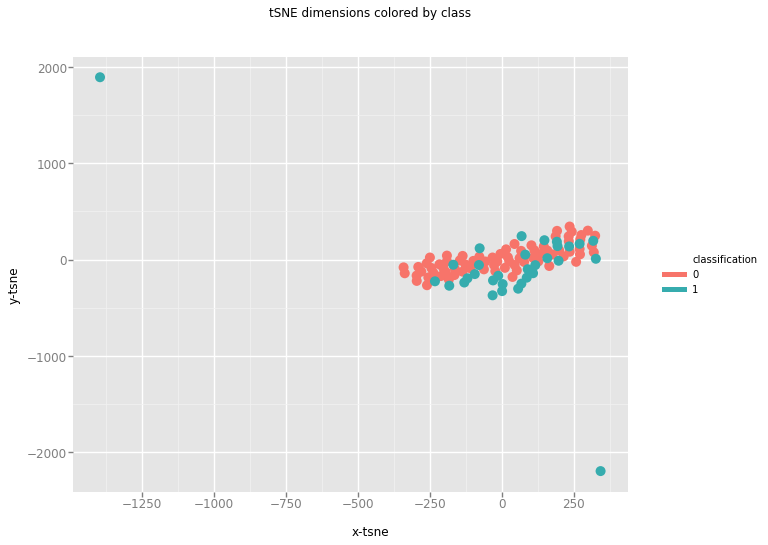

<ggplot: (-9223371917538246214)>
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
32.75253969804271


In [71]:
start_time = timeit.default_timer()
for i in Perplexity:
    for j in n_iter:
        for k in learningRate:
            print("  Perplexity =" + str(i) + "          No of Iterations =" + str(j) + "         Learning Rate =" + str(k) )
            tsne_results=tSNEOptinmisation(i,j,k,principalDF)
            #Execution
            df_tsne = principalDF
            df_tsne['x-tsne'] = tsne_results[:,0]
            df_tsne['y-tsne'] = tsne_results[:,1]
            #df1.merge(df2)
            df_tsne = y.join(df_tsne)
            #PLOT t-SNE
            df_tsne.columns = df_tsne.columns.map(lambda x: x.replace(' ', '_'))
            chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='classification') ) \
                    + geom_point(size=100,alpha=1) \
                    + ggtitle("tSNE dimensions colored by class")
            print(chart)
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
            print('-------------------------------------------------------------')
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)